In [ ]:
!pip install memory-profiler openpyxl

In [2]:
import json, os
for k,v in json.load(open("local.settings.json"))["Values"].items():
    os.environ[k] = v

In [3]:
import pandas as pd
from libs.utils.esquire.neighbors.logic_vectorized import get_all_neighbors
from memory_profiler import memory_usage

# Load the data
df = pd.read_excel("real_sample_formatted.xlsx").drop_duplicates().head(1000)

# Define a wrapper function to run the profiling
def run_get_all_neighbors():
    return get_all_neighbors(df, 3)

# Profile the memory usage
mem_usage_info, return_val = memory_usage(run_get_all_neighbors, interval=0.1, timestamps=True, retval=True)

# Extract memory usage and timestamps
mem_usage = [item[0] for item in mem_usage_info]
timestamps = [item[1] for item in mem_usage_info]

# Convert timestamps to seconds relative to the first timestamp
start_time = timestamps[0]
relative_times = [(t - start_time) for t in timestamps]


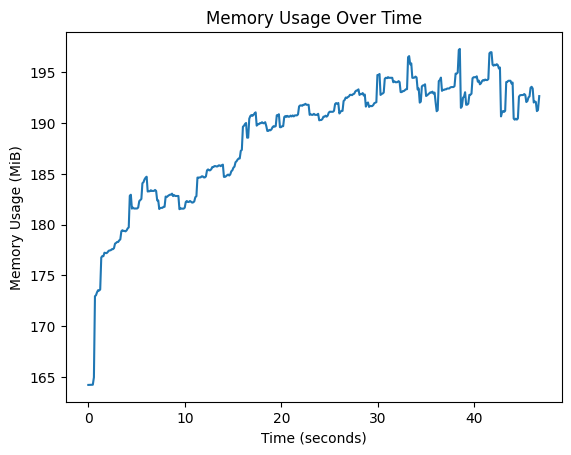

Maximum memory usage: 197.28515625 MiB


In [4]:
import matplotlib.pyplot as plt

# Plot with accurate time on the x-axis
plt.plot(relative_times, mem_usage)
plt.xlabel('Time (seconds)')
plt.ylabel('Memory Usage (MiB)')
plt.title('Memory Usage Over Time')
plt.show()

# Or simply print the maximum memory usage
print(f"Maximum memory usage: {max(mem_usage)} MiB")

In [ ]:
return_val

,street_number,street_name,city,state,zip_code
0,4740,HIGHWAY 7,BAKER,MT,59313
1,251,SODA CREEK,BAKER,MT,59313
2,115,TATLEY,BAKER,MT,59313
3,1847,WEBSTER,BAKER,MT,59313
4,1849,WEBSTER,BAKER,MT,59313
...,...,...,...,...,...
76,8572,GULF,TREASURE ISLAND,FL,33706
77,144,BEACON HILL,WIBAUX,MT,59353
78,491,CARLYLE,WIBAUX,MT,59353
79,6151,HIGHWAY 7,WIBAUX,MT,59353
